**Daniel Goings<br>
dcgoings@buffalo.edu<br>
MTH337 Project 4 - Gases, Fractals and Root Finding**

In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction

Throughout this project, we will learn how equations can be used to describe several aspects of gases and how they relate to eachother, including pressure, temperature, and volumes of an ideal gas. Our project objectives for this section are to identify critical points in gases and at which points different phases of the substance, such as gas, liquid, and solid forms, transition from one to another. It is hinted that we may discover multiple roots for our gases using the bisection and/or Newon-Raphson methods, which reveal the critical points of the gas, and we must acknowledge the cause and reasoning behind this and why it may be an issue. Additionally, we must determine when and why the bisection method and Newton-Raphson methods should be used over one another for root finding.

In the second half of our project, we will dive more into complex numbers, planes, and fractals, and solving equations of fractals analytically. We will use this information and equations to further plot the fractals in the complex plane and make color plots that can be used to identify interesting features that are specific to fractals, such as self similarity.

# PART 1: Critical Points of the Van der Waals equation

### PROBLEM 1: Solving the reduced gas equation for $P_R$, use that equation to make isotherms for VDW's gas. An isotherm is a plot of $P_R$ vs $V_R$ for fixed temperatures. Choose a range of temperatures from around 0.5 to 1.5. Then make plots of $P_R$ vs $V_R$ for each value of $T_R$ on the plot. Make around 10 isotherms on the same plot.

In [5]:
def vdw(Vr,Tr):
    """
    Functions returns the reduced gas equation.
    
    Keywords:
        Tr : temperature of the gas
        Vr : volume of the container that the gas occupies

    """
    
    return  8 / 3 * Tr / (Vr - 1 / 3) - 3 / (Vr ** 2)

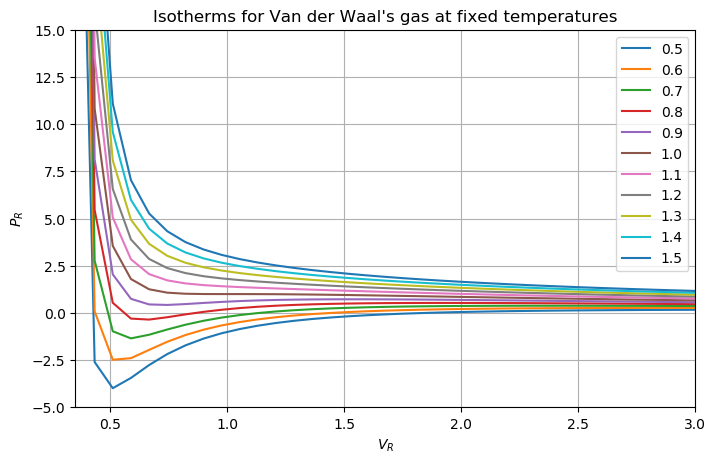

In [78]:
fig, ax = plt.subplots(figsize=(8,5), dpi = 100)

Tr = np.linspace (.5, 1.5, 11)
Vr = np.linspace (0.2, 4)

# for each temperature in our Tr linspace, plot its relationship to volume and pressure in the above equation

for t in Tr:
    plt.plot(Vr,vdw(Vr,t), label = t)
    plt.ylim([-5,15])
    plt.xlim([.35, 3])
    ax.set_title("Isotherms for Van der Waal's gas at fixed temperatures")
    plt.xlabel('$V_R$')
    plt.ylabel('$P_R$')
    plt.legend()
    plt.grid()

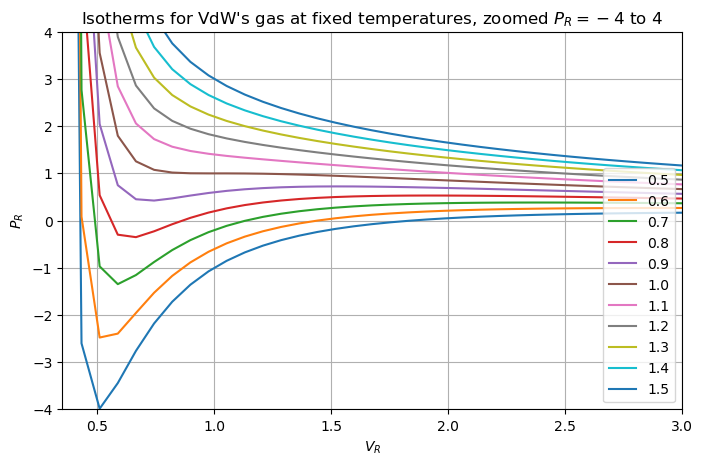

In [114]:
# same plot as above, zoomed at y = [-4, 4] and x =[.35, 3]

fig, ax = plt.subplots(figsize=(8,5), dpi = 100)

Tr = np.linspace (.5, 1.5, 11)
Vr = np.linspace (0.2, 4)

for t in Tr:
    plt.plot(Vr,vdw(Vr,t), label = t)
    plt.ylim([-4, 4])
    plt.xlim([.35, 3])
    ax.set_title("Isotherms for VdW's gas at fixed temperatures, zoomed $P_R = -4$ to $4$")
    plt.xlabel('$V_R$')
    plt.ylabel('$P_R$')
    plt.legend(loc = 'lower right')
    plt.grid()

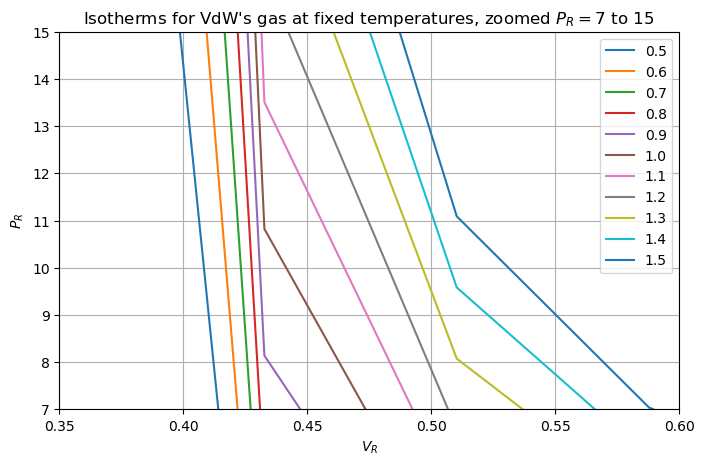

In [115]:
# same plot as above, zoomed at y = [7, 15] and x =[.35, .6]

fig, ax = plt.subplots(figsize=(8,5), dpi = 100)

Tr = np.linspace (.5, 1.5, 11)
Vr = np.linspace (0.2, 4)

for t in Tr:
    plt.plot(Vr,vdw(Vr,t), label = t)
    plt.ylim([7,15])
    plt.xlim([.35, .6])
    ax.set_title("Isotherms for VdW's gas at fixed temperatures, zoomed $P_R = 7$ to $15$ ")
    plt.xlabel('$V_R$')
    plt.ylabel('$P_R$')
    plt.legend()
    plt.grid()

### PROBLEM 2: You will notice that the isotherms show a change in behavior as the temperature is lowered. Describe this behavior from the plot. The temperature at which this behavior change happens is the critical temperature. show that this critical temperature is $T_R = 1$ using your plots (you will see an inflection point at $T_R = 1$

For $T_R < 1.0$ (.5 through .9), we can observe that the pressure values are much lower and with less volume when compared to the high temperature counterparts. For example, at $V_R = 0.5$ for each isotherm, the lowest temperature, 0.5, also has the lowest pressure of approximately -4. Similarly, at $V_R = 0.7$, the third lowest temperature, has the third lowest pressure of approximately -1.

Now on the other hand, if we take a look at the high temperatures, say $T_R = 1.5$ and $T_R = 1.3$ at the same $V_R = 0.5$, we notice that the pressure values correlate on the opposite end of the spectrum. Just as low temperatures yielded low pressure, our high temperatures yield high pressure. For $T_R = 1.5$, we have the highest pressure of approximately 13, and for $T_R = 1.3$ we have a pressure of approximately 9.5.

With all of the said, we notice that at $T_R = 1.0$, the direction of pressure never changes. For example, we can easily observe that for $T_R$ values between 1.0 and 1.5, pressure and volume both decrease but the pressure never goes back up (or changes direction). However, this is not the case for $T_R$ values between 0.5 and 1.0. For these temperatures, we can observe that there is a relationship between the volume and pressure where, at a given point, the pressure actually reverses direction. As previously stated, for $T_R = 1.5$, this takes place at $V_R = .5$ and  $P_R = -4$, where the pressure then begins to increase.

With this information, we can conclude that the point in which this behavior change takes place, i.e. $T_R = 1$, is the critical temperature.

### PROBLEM 3: Now, let us study this more quantitatively. Take two situations -- one with $T_R < 1$, say $T_R = 0.8$, and $T_R > 1$, say $T_R = 1.2$. We have previously observed that when $T_R > 1$, there are no inflection points and there is only one value of $V_R$ for each value of $P_R$. For instance, consider the value $P_R = 0.4$ when $T_R = 0.8$. You will see that the curve passes through this value of $P_R$ at three different values of $V_R$.

### Find the values of these volumes using the bisection method and the Newton-Raphson method by calculating when the curve is equal to these values of pressure. You will need to convert this into a root finding problem first. You can use $T_R = 0.8$ and $P_R = 0.4$ if you wish.

So using the above values, $T_R = 0.8$ and $P_R = 0.4$, we plug those into the original given equation in PROBLEM 1.

$$ .4 = \frac{8(.8)}{3V_R-1} - \frac{3}{{V_R}^2}$$

$$ \frac{8(.8)}{3V_R-1} - \frac{3}{{V_R}^2} - .4 = 0$$

$$ \frac{6.4}{3V_R-1} - \frac{3}{{V_R}^2} - .4 = 0$$

$$ $$

$$ \text{find least common multiple, cancel denominators, and multiply} = {V_R}^2 (3V_R-1) $$

$$ 6.4({V_R}^2) - 3(3V_R-1) - .4(3{V_R}^3 - {V_R}^2) = 0$$

$$ 6.4{V_R}^2 - 9V_R + 3 - 1.2{V_R}^3 + .4{V_R}^2 = 0$$

$$ 6.8{V_R}^2 - 9V_R + 3 - 1.2{V_R}^3 = 0 $$

$$ - 1.2{V_R}^3 + 6.8{V_R}^2 - 9V_R + 3  = 0 $$

$$ $$

$$ \text{Now we need to get the derivative of this for later use..} $$

$$ - 1.2{V_R}^3 + 6.8{V_R}^2 - 9V_R + 3  = 0 $$

$$ - 3.6{V_R}^2 + 13.6{V_R} - 9 = 0 $$

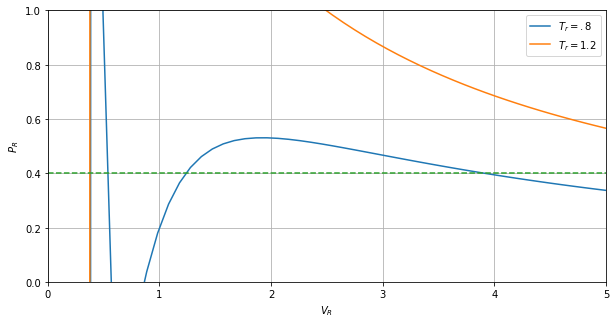

In [97]:
# Builds a new plot that shows the graph for Tr = .8 and Tr = 1.2

Tr1 = .8
Tr2 = 1.2
Vr = np.linspace (0.2, 5)

plt.figure(figsize=(10,5))
plt.plot(Vr,vdw(Vr,Tr1), label = '$T_r = .8$')
plt.plot(Vr,vdw(Vr,Tr2), label = '$T_r = 1.2$')
plt.plot([0,5], [.4, .4], '--')

plt.ylim([0,1])
plt.xlim([0,5])

plt.xlabel('$V_R$')
plt.ylabel('$P_R$')
plt.legend()
plt.grid()

As seen above, and as mentioned in the problem set, there is only one value of $V_R$ for each value of $P_R$ when $T_R > 1$. Additionally, we can see that the curve $T_R = 0.8$ does, in fact, pass through $P_R = 0.4$ at three different values for $V_R$. We can find these roots using the Bisection and Newton-Raphson methods.

In [104]:
# define our function to be later used in mybisection and newton functions, taken from solved equation above

def f(Vr):
    return ( (-1.2 * Vr ** 3) + (6.8 * Vr ** 2) - (9 * Vr) + 3 )

# define our derivative of the above function to be later used in mybisection and newton functions,, also solved above

def df(Vr):
    return ( (-3.6 * Vr ** 2) + (13.6 * Vr) - 9 )

In [103]:
def mybisection(f, a, b, tol):
    """
    Returns the roots of the input function.
    
    Keywords:
        f: function where roots need to be found
        a: left most point of bracket
        b: right most point of bracket
        tol: decimal point precision desired
        
    """
    fa = f(a)
    fb = f(b)
    reps = 1
    while np.abs(a-b) > tol:
        
        c = (b+a)/2
        fc = f(c)
        if  np.sign(fc) == np.sign(fa):
            a = c
            fa = fc
        else:
            b = c
            fb = fc
        reps += 1
    
    return a

In [100]:
# first root

mybisection(f, 0.1, 1, tol = 10**(-10)) 

0.5165701243386136

In [101]:
# second root

mybisection(f, 1, 2, tol = 10**(-10)) 

1.2366687994799577

In [102]:
# third root

mybisection(f, 3, 4, tol = 10**(-10))

3.9134277427801862

In [10]:
def newton(f, df, x, tol):
    """
    Returns the roots of the input function in a different manner than the bisection method function.
    
    Keywords:
        f: function where roots need to be found
        a: left most point of bracket
        b: right most point of bracket
        tol: decimal point precision desired
    
    """
    fx = f(x)
    dfx = df(x)
    reps = 1
    while abs(fx/dfx) > tol:
        x = x - fx/dfx
        fx = f(x)
        dfx = df(x)
        reps += 1
    return x

In [16]:
# first root
print(newton(f, df, 0, tol = 10**(-10)))

0.5165701242757146


In [17]:
# second root
print(newton(f, df, 1, tol = 10**(-10)))

1.2366687995096382


In [19]:
# third root
print(newton(f, df, 3, tol = 10**(-10)))

3.913427742796644


### PROBLEM 4: Analyze the results. Does it make sense to have three roots? In other words, does it make sense to have three different answers for volume for the same values of pressure and temperature? Hint: Imagine you start off on a road trip. Your friend times the trip sitting in the passenger seat. At the end of the trip you ask your friend the time taken for the entire trip and your friend gives you three different times. Does that make sense?

Given the hint, clearly it does not make sense to have three roots. The explanation for this is that while there are three solutions to the equation, the critical states are not reached because it is not physically feasible. To further clarify this, this means that there comes a point where the system contains two actually separated phases. This could be described as "metastable states", which further means an overheated liquid or an undercooled gas.[3]


# PART 2: Complex numbers and fractals in the complex plane

### PROBLEM 1: Calculate the roots of $z^3 = 1$ analytically.

$$ z^3 = 1 $$

$$ z^3 - 1 = 0 $$

$$ (z-1)(z^2 + z + 1) = 0 $$

$$ z = 1 \text{ (first root)} $$

$$  $$

$$ z^2 + z + 1 = 0$$

$$Use\,\, quadratic\,\, equation.$$

$$ ax^2 + bx + c = 0 $$

$$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

$$ z = \frac{-1 \pm \sqrt{1^2 - 4(1)(1)}}{2(1)} $$

$$ z = -\frac{1}{2} \pm \frac{\sqrt{-3}}{2} $$ 

$$ This\,\, is\,\, complex.\,\, Therefore.. $$

$$ z = 1 \,\,,\,\, z = -\frac{1}{2} + \frac{i\sqrt{-3}}{2} \,\,,\,\, z = -\frac{1}{2} - \frac{i\sqrt{-3}}{2} $$ 

### PROBLEM 2: In the complex plane, use boolean arrays and the image objects to make color plots of points which converge to these roots using the Newton-Raphson method like we did in class.

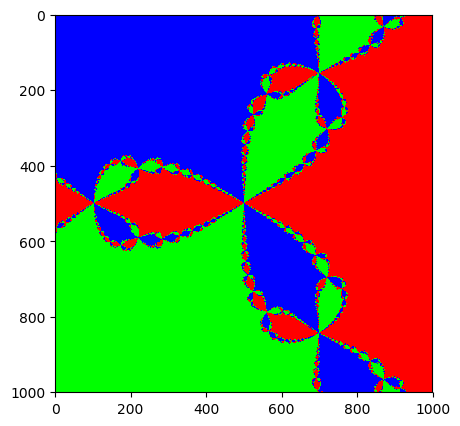

In [105]:
# original fractal plot

roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])

npts = 1000
x = np.linspace(-1, 1, npts)
y = np.linspace(-1j, 1j, npts)

X, Y = np.meshgrid(x, y)

Z = X+Y

niters = 100
for i in range(niters):
    Z = Z - (Z**3-1)/(3*Z**2)

tol = 0.01
root1 = np.abs(Z - roots[0]) < tol
root2 = np.abs(Z - roots[1]) < tol
root3 = np.abs(Z - roots[2]) < tol

img = np.zeros((npts, npts, 3))
img[:,:,0] = root1
img[:,:,1] = root2
img[:,:,2] = root3
fig = plt.figure(figsize=(8,5), dpi=100)
plt.imshow(img)

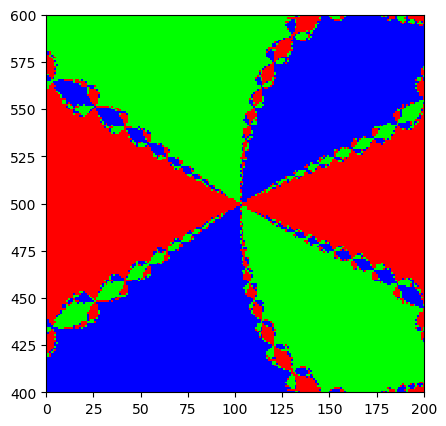

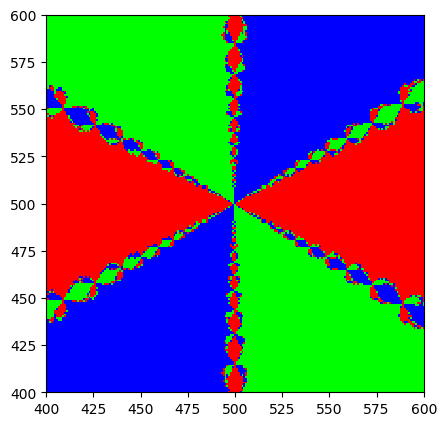

In [113]:
# original fractal plot zoomed in at two different locations

# first zoomed in between x = [0, 200] and y = [400, 600]
# second zoomed in between x = [400, 600] and y = [400, 600]

# first zoom of fractal:

roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])

npts = 1000
x = np.linspace(-1, 1, npts)
y = np.linspace(-1j, 1j, npts)

X, Y = np.meshgrid(x, y)

Z = X+Y

niters = 100
for i in range(niters):
    Z = Z - (Z**3-1)/(3*Z**2)

tol = 0.01
root1 = np.abs(Z - roots[0]) < tol
root2 = np.abs(Z - roots[1]) < tol
root3 = np.abs(Z - roots[2]) < tol

img = np.zeros((npts, npts, 3))
img[:,:,0] = root1
img[:,:,1] = root2
img[:,:,2] = root3
fig = plt.figure(figsize=(8,5), dpi=100)
plt.xlim([0, 200])
plt.ylim([400, 600])
plt.imshow(img)

# second zoom of fractal

roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])

npts = 1000
x = np.linspace(-1, 1, npts)
y = np.linspace(-1j, 1j, npts)

X, Y = np.meshgrid(x, y)

Z = X+Y

niters = 100
for i in range(niters):
    Z = Z - (Z**3-1)/(3*Z**2)

tol = 0.01
root1 = np.abs(Z - roots[0]) < tol
root2 = np.abs(Z - roots[1]) < tol
root3 = np.abs(Z - roots[2]) < tol

img = np.zeros((npts, npts, 3))
img[:,:,0] = root1
img[:,:,1] = root2
img[:,:,2] = root3
fig = plt.figure(figsize=(8,5), dpi=100)
plt.xlim([400, 600])
plt.ylim([400, 600])
plt.imshow(img)

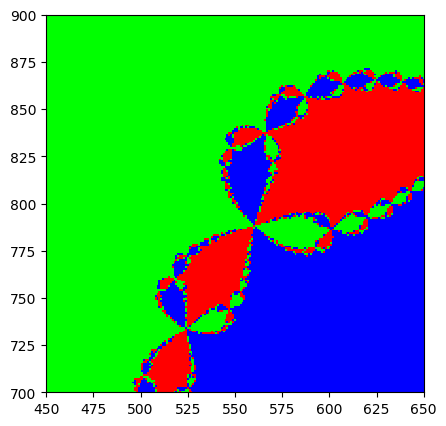

In [108]:
# third zoom at x = [450, 650] and y = [700, 900]

roots = np.array([complex(np.cos(2*np.pi*i/3), np.sin(2*np.pi*i/3)) for i in range(3)])

npts = 1000
x = np.linspace(-1, 1, npts)
y = np.linspace(-1j, 1j, npts)

X, Y = np.meshgrid(x, y)

Z = X+Y

niters = 100
for i in range(niters):
    Z = Z - (Z**3-1)/(3*Z**2)

tol = 0.01
root1 = np.abs(Z - roots[0]) < tol
root2 = np.abs(Z - roots[1]) < tol
root3 = np.abs(Z - roots[2]) < tol

img = np.zeros((npts, npts, 3))
img[:,:,0] = root1
img[:,:,1] = root2
img[:,:,2] = root3
fig = plt.figure(figsize=(8,5), dpi=100)
plt.xlim([450, 650])
plt.ylim([700, 900])
plt.imshow(img)

### PROBLEM 3: What you will see is a fractal. Read up on fractals. Explore the different regions of this plane. Zoom into different areas and show self similarity in the structure.

As we briefly touched on in the previous project, fractals are are abstract objects that commonly display patterns and self similarity at various smaller scales [2]. Although the above images are "blurry" or less defined, with an infinite number of iterations, we would be able to endlessly zoom in and see these patterns on an infinite scale. We would be able to identify identical patterns as in previous sections of the fractal which would make the exact scale that is being viewed very difficult to identify.

As seen in the zoomed images above, we see self similarity at multiple points. Zooming at the center point of the original image matches up with a portion observed between x = 0 and 200, as well as another image between y = 700 and 900. We can see the repetition of colors, shapes, and patterns over and over again, and given a large enough number of iterations, would continue indefinitely.

### PROBLEM 4: Repeat 1-3 for the equation $z^4 = 1$.

$$ z^4 = 1 $$

$$ z^4 - 1 = 0 $$

$$ (z^2 - 1)(z^2 + 1) = 0 $$

$$ $$

$$ Solve\, left\, side. $$

$$ z^2 = 1 $$

$$ z = 1,\,\, z = -1 $$

$$  $$

$$ Solve\, right\, side. $$

$$ z^2 = -1 $$

$$ z = \sqrt{-1} $$

$$ z = +\sqrt{-1},\,\, z = -\sqrt{-1} $$

$$ z = i,\,\, z = -i $$

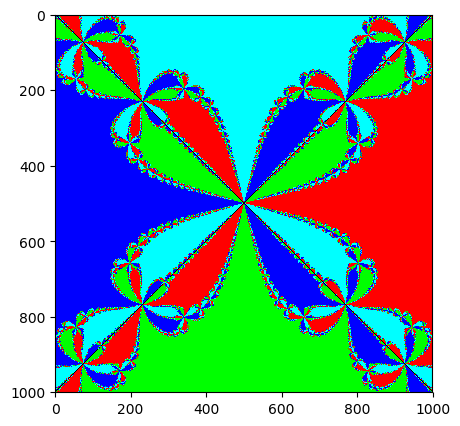

In [28]:
#same code taken for the previous z^3 - 1 = 0; adjusted for z^4

roots = np.array([complex(np.cos(2*np.pi*i/4), np.sin(2*np.pi*i/4)) for i in range(4)])

npts = 1000
x = np.linspace(-1, 1, npts)
y = np.linspace(-1j, 1j, npts)

X, Y = np.meshgrid(x, y)

Z = X+Y

niters = 100
for i in range(niters):
    Z = Z - (Z**4-1)/(4*Z**3)

tol = 0.01
root1 = np.abs(Z - roots[0]) < tol
root2 = np.abs(Z - roots[1]) < tol
root3 = np.abs(Z - roots[2]) < tol
root4 = np.abs(Z - roots[3]) < tol

img = np.zeros((npts, npts, 3))
img[:,:,0] = root1
img[:,:,1] = root2
img[:,:,2] = root3
img[:,:,1] += root4
img[:,:,2] += root4
fig = plt.figure(figsize=(8,5), dpi=100)
plt.imshow(img)

# CONCLUSION

Throughout this project, we were able to successfully analyze the relationship that pressure, temperature, and volume has on gases and the effects they have on their phase transitions. We discovered that while there may be several critical points associated with gases at certain temperature thresholds, in our case when $T_R < 1$, those critical points may never be reached based on physical limitations and unfeasibility. Additionally, while finding these critical points, we used both the bisection and Newton-Raphson methods and learned of some of their limitations, such as the need to have a rough idea of roots if using the NR method.

Additionally, we were able to find solutions to equations that have complex numbers as roots and were able to plot them in the complex plane, revealing themselves as fractals. At this point, we were able to plot these equations and identify those features that are special and specific to fractals, such as similarity, and point out these identifiable landmarks by zooming into several portions of the graph.

### SOURCES

[1] Class Notes / Professor's Notes/Emails

[2] https://en.wikipedia.org/wiki/Fractal

[3] https://en.wikipedia.org/wiki/Maxwell_construction

[4] https://en.wikipedia.org/wiki/Newton%27s_method